## LOAN  PREDICTION  USING  MACHINE  LEARNING

 Banks are  making major  part of  profits through  loans. Though  lot of  people are  applying for loans.  It’s  hard  to  select  the  genuine  applicant,  who  will  repay  the  loan.  While  doing  the  process manually,  lot  of  misconception  may  happen  to  select  the  genuine  applicant. 
 

Therefore, developing  loan  prediction  system  using  machine  learning,  so  the  system  automatically  selects  the eligible candidates. This is helpful to both bank staff and applicant. The time period for the sanction of loan will be drastically reduced. In this project we are predicting the loan data by using some machine learning algorithms. 

AIM : 

The major aim of this project is to predict which of the customers will have their loan paid or not. Therefore, this is a supervised classification problem to be trained with algorithms like:
1. Logistic Regression
2. Random Forest 
3. Linear SVM

In [1]:
# importing essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading csv file
loan_data = pd.read_csv(r"C:\Users\VAISHNAVI\Downloads\loan_train.csv")

In [3]:
# printing first five rows of dataset
loan_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Printing last five rows of datset
loan_data.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# Obtaining the dimensions of dataset
loan_data.shape

(614, 13)

In [6]:
# Gives decription of the dataset
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Statistical summary of dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# Check null values
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
                    # Dealing with Categorical values
    
# Gender Column
loan_data['Gender'] =  loan_data['Gender'].map({'Male':0,'Female':1})

# Married column
loan_data['Married'] = loan_data['Married'].map({'No':0,'Yes':1})

# Loan_Status column
loan_data['Loan_Status'] =loan_data['Loan_Status'].map({'N':0,'Y':1})

In [10]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,0.0,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0.0,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0.0,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0.0,0.0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,0.0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,0.0,1.0,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,0.0,1.0,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,0.0,1.0,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


### Filling Missing Values

In [11]:
# Gender column 
loan_data['Gender'] = loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])

In [12]:
# Married column
loan_data['Married'] = loan_data['Married'].fillna(loan_data['Married'].mode()[0])

In [13]:
# Dependents Column
loan_data['Dependents'] = loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0])

In [14]:
# Self_Employed Column
loan_data['Self_Employed'].fillna('No',inplace=True)

In [15]:
# Credit_History Column
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0])

In [16]:
# LoanAmount Column
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median())

In [17]:
# Loan_Amount Column
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0])

### Exploratory Data Analysis

In [18]:
# Counting the accurance of each value in Gender column
loan_data['Gender'].value_counts()

0.0    502
1.0    112
Name: Gender, dtype: int64

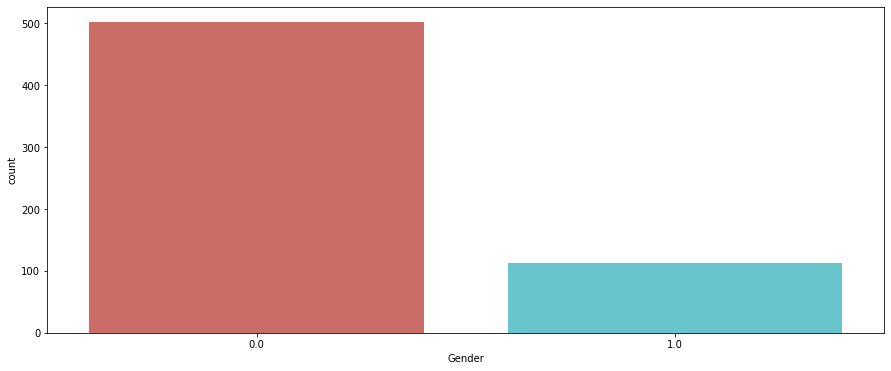

In [19]:
plt.figure(figsize=(15,6))
sns.countplot('Gender', data= loan_data, palette = 'hls' )
plt.show()

In [20]:
# Counting the accurance of each value in Dependent column
loan_data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

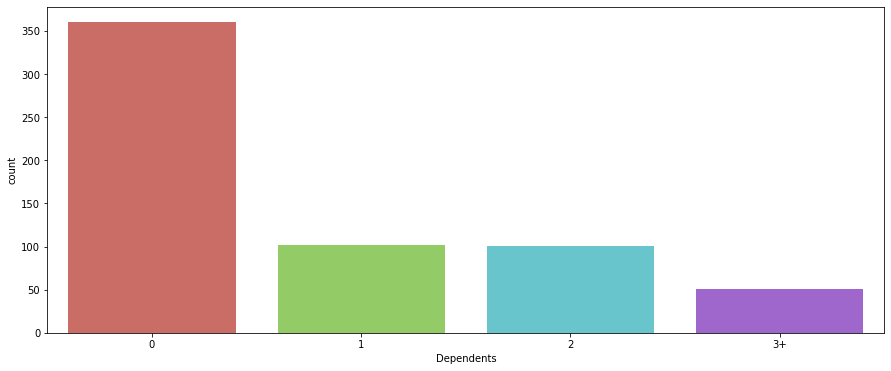

In [21]:
plt.figure(figsize=(15,6))
sns.countplot('Dependents', data = loan_data, palette='hls')
plt.show()

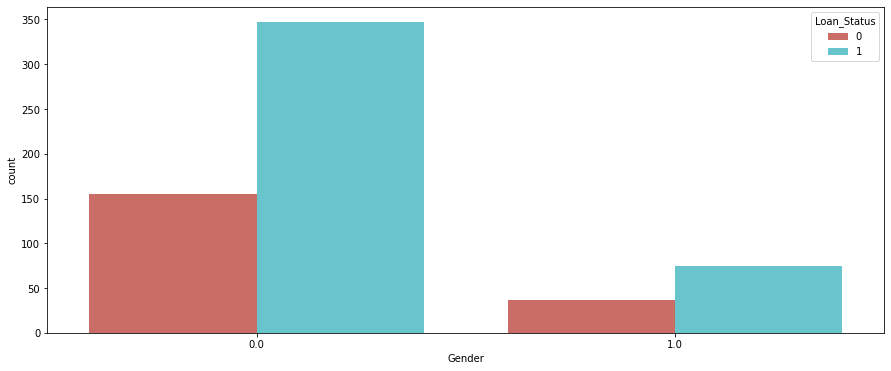

In [22]:
# comparing loan status with gender column
plt.figure(figsize=(15,6))
sns.countplot(x = 'Gender',hue ='Loan_Status', data=loan_data , palette='hls')
plt.show()

 More males are on loan than females. Also, those that are on loan are more than otherwise 

<AxesSubplot:xlabel='Married', ylabel='count'>

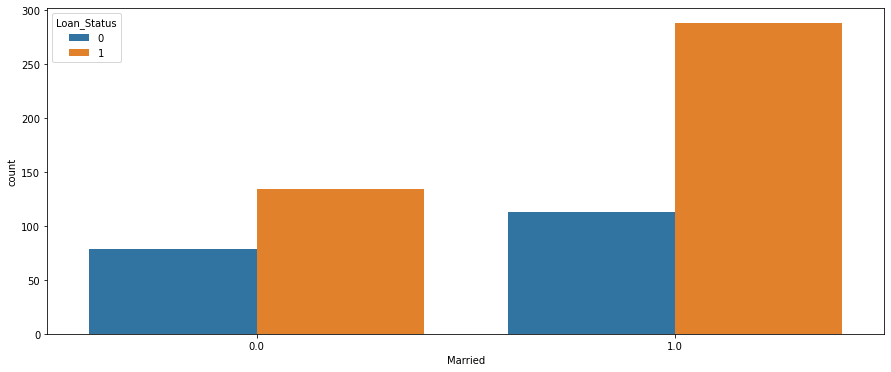

In [23]:
# comparing loan status with married column
plt.figure(figsize = (15,6))
sns.countplot( x='Married', hue ='Loan_Status', data = loan_data)

 Married people collect more loan than unmarried

In [24]:
#Counting the occurence of each value with Loan_amount_term column
loan_data['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

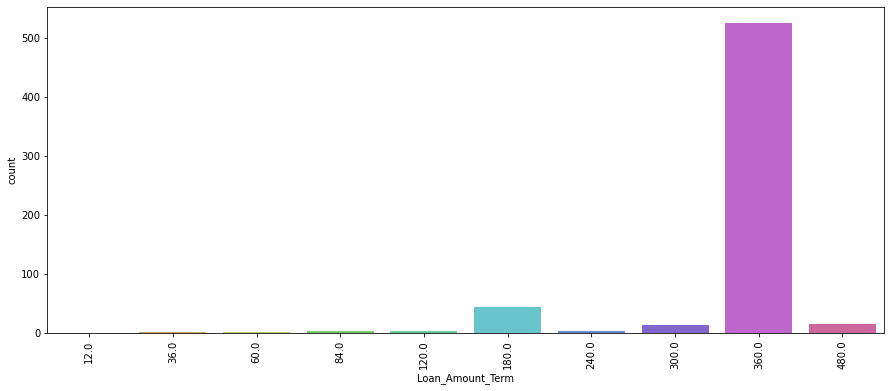

In [25]:
plt.figure(figsize=(15,6))
sns.countplot('Loan_Amount_Term', data = loan_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

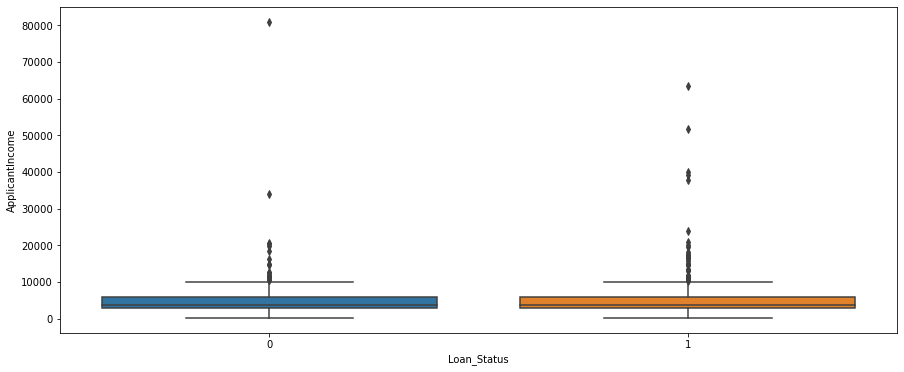

In [26]:
# plotting boxplot
plt.figure(figsize=(15,6))
sns.boxplot(x='Loan_Status',y = 'ApplicantIncome', data=loan_data)
plt.show()

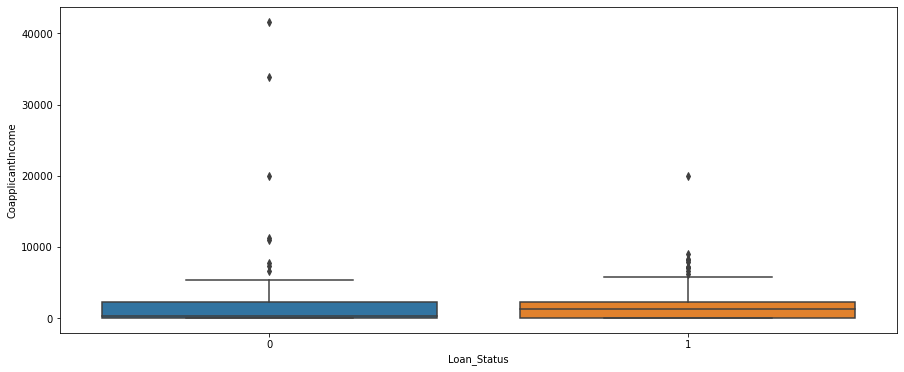

In [27]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Loan_Status',y = 'CoapplicantIncome', data=loan_data)
plt.show()

<AxesSubplot:>

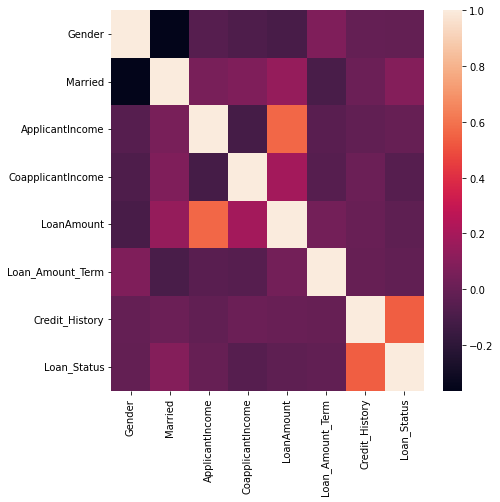

In [28]:
# Showing correlation through heatmap
plt.figure(figsize=(7,7))
sns.heatmap(loan_data.corr())

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

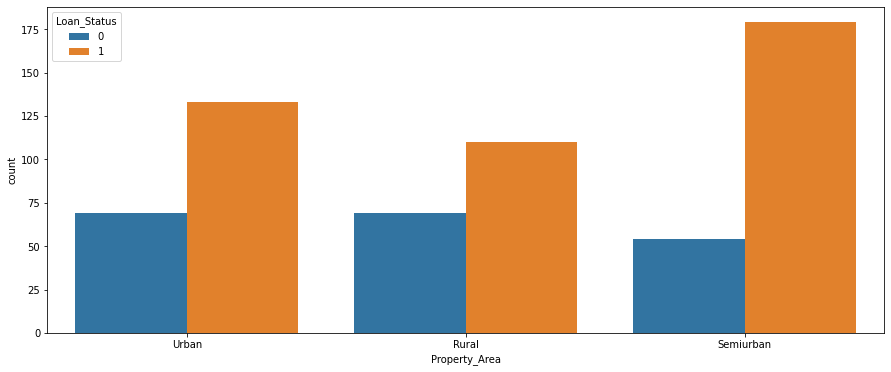

In [29]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Property_Area', hue='Loan_Status', data = loan_data)

   Semiurban obtain more loan, folowed by Urban and then rural.  

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

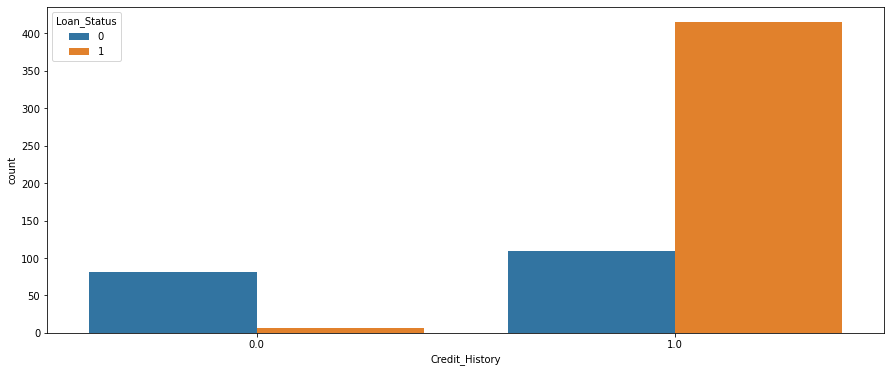

In [30]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Credit_History', hue='Loan_Status', data = loan_data)

  According to the credit history, greater number of people pay back their loans.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

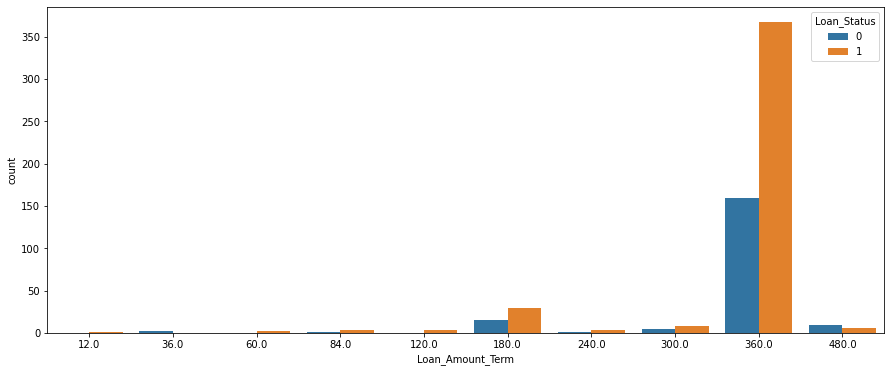

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Loan_Amount_Term', hue='Loan_Status', data = loan_data)

    An extremely high number of them go for a 360 cyclic loan term. That’s pay back within a year

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

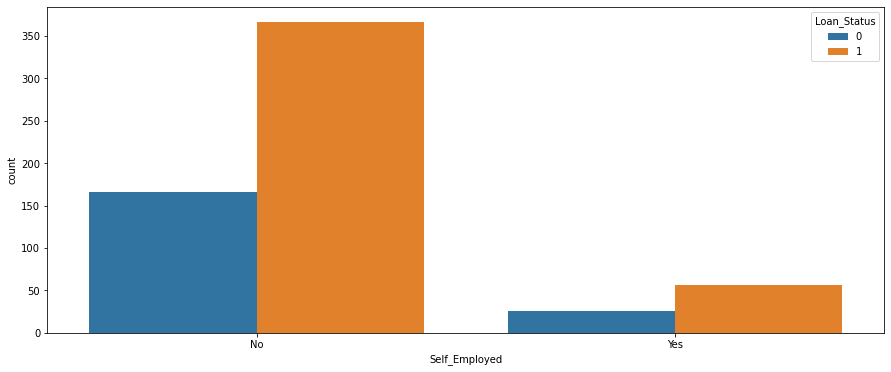

In [32]:
plt.figure(figsize=(15,6))
sns.countplot( x = 'Self_Employed', hue = 'Loan_Status', data = loan_data)

The category of those that take loans is less of self-employed people. That those who are not self-employed probably salary earners obtain more loan.

### Model Building and Prediction

In [33]:
X = loan_data[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount',
'Credit_History']]
y = loan_data.Loan_Status

In [34]:
# Data Splitting
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.2,
random_state = 10)

**Random forest algorithm**

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=4, random_state = 10)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=10)

In [36]:
from sklearn.metrics import accuracy_score
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7967479674796748

In [37]:
pred_train = model.predict(x_train)
print("Accuracy: ",accuracy_score(y_train,pred_train))

Accuracy:  0.8167006109979633


**Logistic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [39]:
from sklearn.metrics import accuracy_score
y_pred= model.predict(x_train) 
print("Accuracy: ",accuracy_score(y_pred,y_train))

Accuracy:  0.8126272912423625


**Linear svm**

In [40]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
model.fit(x_train, y_train)

SGDClassifier(alpha=0.001, max_iter=15, random_state=5, tol=None)

In [41]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_train)
print("Accuracy: ",accuracy_score(y_pred,y_train))

Accuracy:  0.6822810590631364
